**Importing Libraries**

In [45]:
import pandas as pd
import numpy as np
!pip install lazypredict

**Cleaning Data**

In [46]:
df = pd.read_csv('breast_cancer_survival.csv')


#Loop to iterate through columns in df
#And create list of column names with NaN values
columns_with_null = []
for i in df.columns:
    if df[i].isnull().any():
        columns_with_null.append(i)


threshold = 0.1 * len(df)  # Defining the threshold based on total rows
columns_to_drop = []
#Iterating through the columns_with_null list
for column_name in columns_with_null:
  if df[column_name].isnull().sum() > threshold:
    columns_to_drop.append(column_name)

print(columns_to_drop)
df = df.drop(columns = columns_to_drop)
#columns_to_drop was an empty list, hence nothing was dropped


#Dropping null values directly
data_cleaned = df.dropna()
data_cleaned.info()

#Dropping duplicate rows
data_cleaned = data_cleaned.drop_duplicates()


[]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    int64  
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.6

**Data Visualisation**

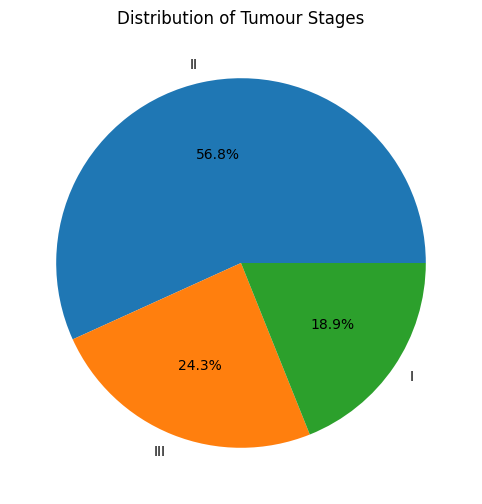

Index(['II', 'III', 'I'], dtype='object')

In [47]:
import matplotlib.pyplot as plt
tumour_stage_counts = data_cleaned['Tumour_Stage'].value_counts()
#.value_counts() method returns a Series object, i.e a labeled 1-D array

#pie-chart
plt.figure(figsize=(8, 6))
plt.pie(tumour_stage_counts, labels=tumour_stage_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Tumour Stages')
plt.show()

tumour_stage_counts.index

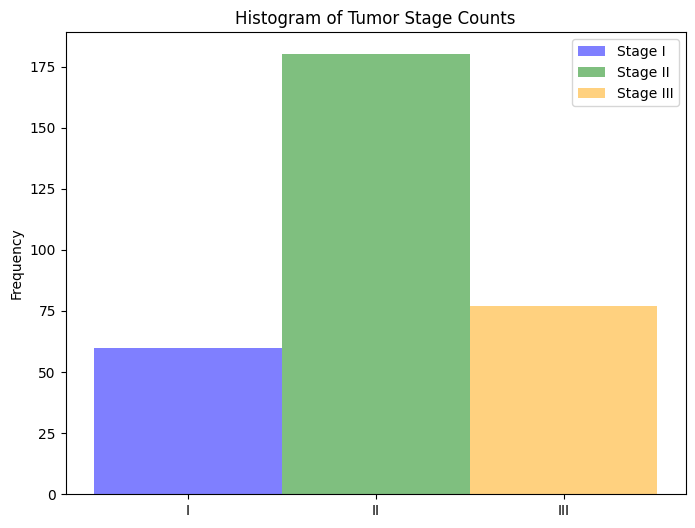

In [48]:
# Historgram of counts of people with different Tumor Stages

plt.figure(figsize=(8, 6))

# Tumor Stage I
tumour_stage_I = data_cleaned[data_cleaned['Tumour_Stage'] == 'I']['Tumour_Stage']
plt.hist(tumour_stage_I,bins=1, color='blue', label='Stage I',alpha=0.5)

# Tumor Stage II
tumour_stage_II = data_cleaned[data_cleaned['Tumour_Stage'] == 'II']['Tumour_Stage']
plt.hist(tumour_stage_II, bins=1, color='green', label='Stage II',alpha=0.5)

# Tumor Stage III
tumour_stage_III = data_cleaned[data_cleaned['Tumour_Stage'] == 'III']['Tumour_Stage']
plt.hist(tumour_stage_III, bins=1, color='orange', label='Stage III',alpha=0.5)

plt.ylabel('Frequency')
plt.title('Histogram of Tumor Stage Counts')
plt.legend()
plt.show()


In [49]:
# Rename the 'Patient_Status' column to 'Target' and map labels
data_cleaned.rename(columns={'Patient_Status': 'Target'}, inplace=True)


# Drop the original 'Patient_Status' column
data_cleaned['Target'] = data_cleaned['Target'].replace({'Dead': 0})
data_cleaned['Target'] = data_cleaned['Target'].replace({'Alive': 1})



# Display the first few rows of the modified DataFrame
data_cleaned.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1


In [50]:
# Define the age bins
age_bins = [0, 20, 40, 60, 80, 100]
# Create a new column 'age_bins' with binned age values
data_cleaned['age_bins'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
# Display the first few rows of the modified DataFrame
print(data_cleaned.head())

   Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0   42  FEMALE   0.95256   2.15000  0.007972 -0.048340           II   
1   54  FEMALE   0.00000   1.38020 -0.498030 -0.507320           II   
2   63  FEMALE  -0.52303   1.76400 -0.370190  0.010815           II   
3   78  FEMALE  -0.87618   0.12943 -0.370380  0.132190            I   
4   42  FEMALE   0.22611   1.74910 -0.543970 -0.390210           II   

                       Histology ER status PR status HER2 status Surgery_type  \
0  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
1  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
2  Infiltrating Ductal Carcinoma  Positive  Positive    Negative   Lumpectomy   
3  Infiltrating Ductal Carcinoma  Positive  Positive    Negative        Other   
4  Infiltrating Ductal Carcinoma  Positive  Positive    Positive   Lumpectomy   

  Date_of_Surgery Date_of_Last_Visit  Target age_bins  
0       20-May-18          26-

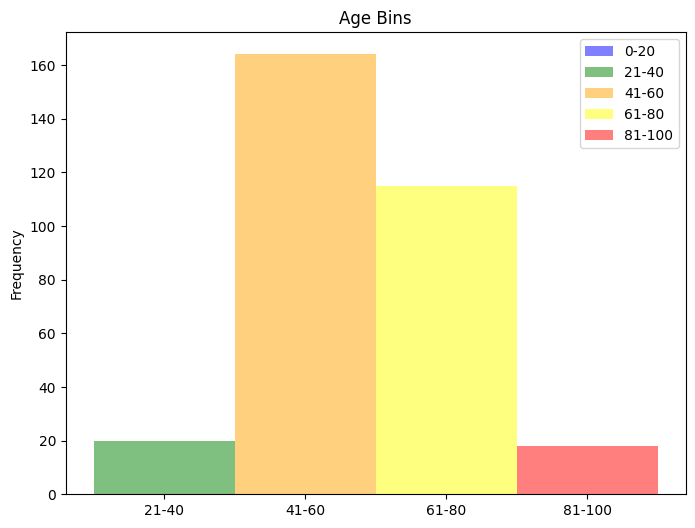

In [51]:

# Separate histograms for each age bin with different colors
plt.figure(figsize=(8, 6))

# 0-21
plt.hist(data_cleaned[data_cleaned['age_bins'] == '0-20']['age_bins'],bins=1, color='blue', label='0-20',alpha=0.5)

# 21-40
plt.hist(data_cleaned[data_cleaned['age_bins'] == '21-40']['age_bins'], bins=1, color='green', label='21-40',alpha=0.5)

# 41-60
plt.hist(data_cleaned[data_cleaned['age_bins'] == '41-60']['age_bins'], bins=1, color='orange', label='41-60',alpha=0.5)

# 61-80
plt.hist(data_cleaned[data_cleaned['age_bins'] == '61-80']['age_bins'],bins=1, color='yellow', label='61-80',alpha=0.5)

# 81-100
plt.hist(data_cleaned[data_cleaned['age_bins'] == '81-100']['age_bins'], bins=1, color='red', label='81-100',alpha=0.5)


plt.ylabel('Frequency')
plt.title('Age Bins')
plt.legend()
plt.show()

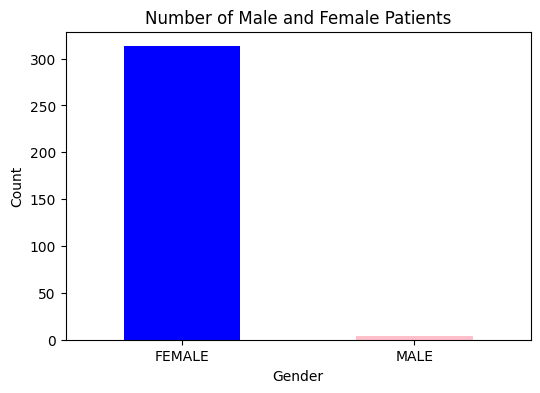

The bar chart shows that there are more female patients than male patients in the given data. This distribution might be due to various factors, including the prevalence of breast cancer among females, the dataset's source or collection method, and the demographics of the population sampled.


In [52]:
# Count occurrences of each gender category
gender_counts = data_cleaned['Gender'].value_counts()

# Create a bar chart showcasing number of male and female patients
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Patients')
plt.xticks(rotation=0)
plt.show()
print("The bar chart shows that there are more female patients than male patients in the given data. " \
              "This distribution might be due to various factors, including the prevalence of breast cancer " \
              "among females, the dataset's source or collection method, and the demographics of the population " \
              "sampled.")

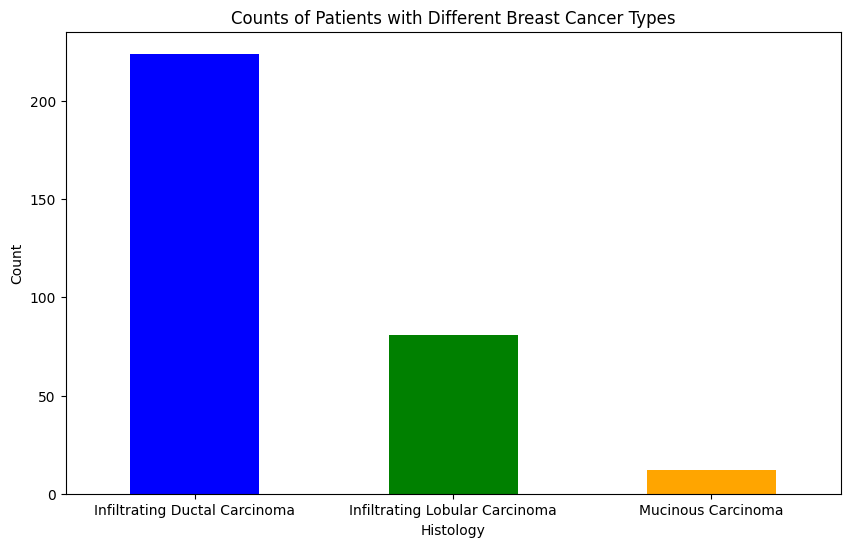

In [53]:
# Count occurrences of each histology category
histology_counts = data_cleaned['Histology'].value_counts()
# Create a bar chart of counts of patients with different breast cancer types
plt.figure(figsize=(10, 6))
histology_counts.plot(kind='bar', color=['blue', 'green', 'orange'])
plt.xlabel('Histology')
plt.ylabel('Count')
plt.title('Counts of Patients with Different Breast Cancer Types')
plt.xticks(rotation=0)
plt.show()

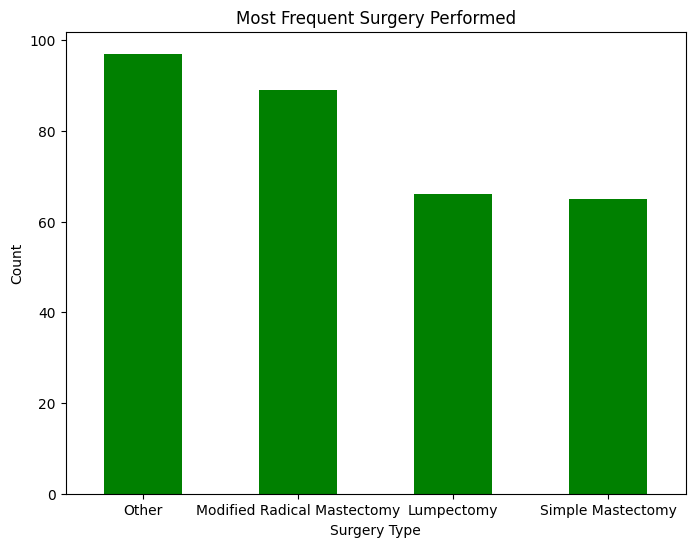

The most frequent surgery performed is: Other


In [54]:
# Count occurrences of each surgery type
surgery_counts = data_cleaned['Surgery_type'].value_counts()


# Create a bar chart of the most frequent surgery performed
plt.figure(figsize=(8, 6))
surgery_counts.plot(kind='bar', color='green')
plt.xlabel('Surgery Type')
plt.ylabel('Count')
plt.title('Most Frequent Surgery Performed')
plt.xticks(rotation=0)
plt.show()

# Display the most frequent surgery type
most_frequent_surgery = surgery_counts.idxmax()
print(f"The most frequent surgery performed is: {most_frequent_surgery}")

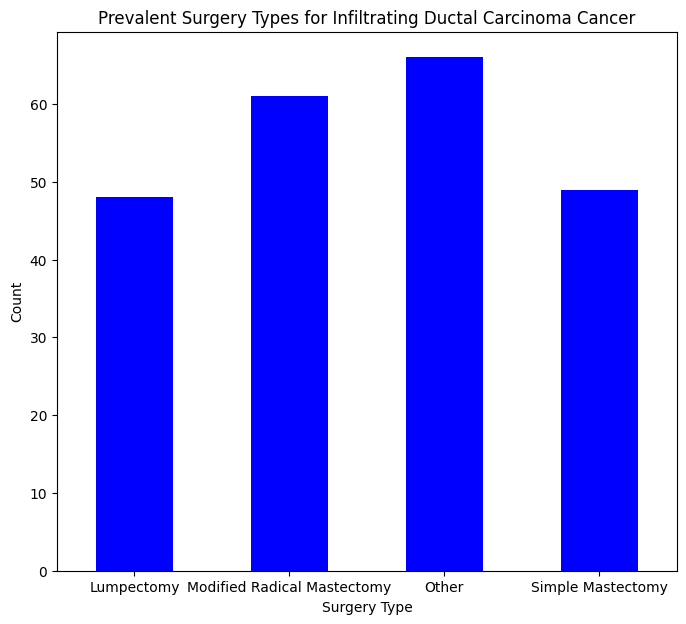

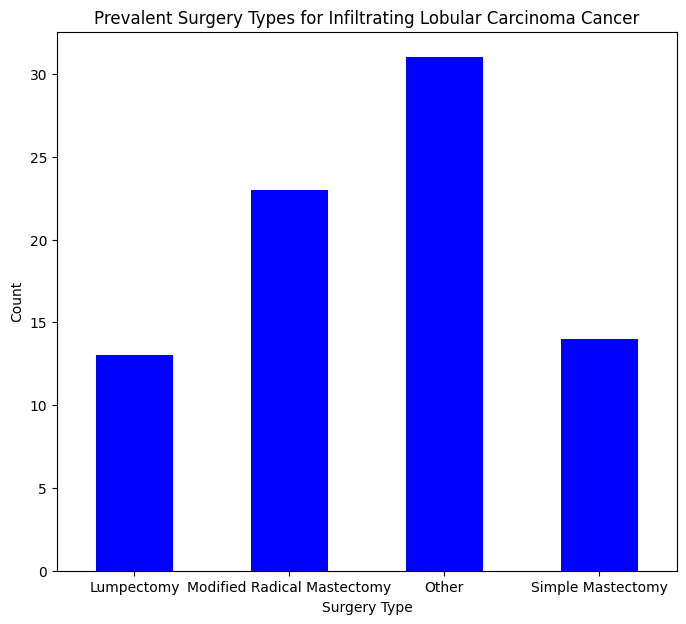

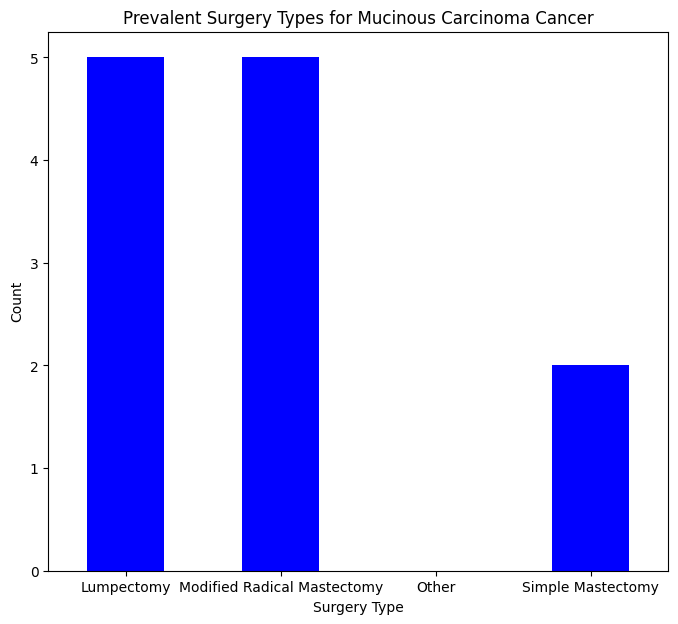

In [55]:
# Group the data by 'Histology' and 'Surgery_type', and count occurrences
grouped_data = data_cleaned.groupby(['Histology', 'Surgery_type']).size().unstack(fill_value=0)
# Plot bar charts for prevalent surgery types for each breast cancer type
for histology in grouped_data.index:
    surgery_counts = grouped_data.loc[histology]
    plt.figure(figsize=(8, 7))
    surgery_counts.plot(kind='bar', color='blue')
    plt.xlabel('Surgery Type')
    plt.ylabel('Count')
    plt.title(f'Prevalent Surgery Types for {histology} Cancer')
    plt.xticks(rotation=0)
    plt.show()

<ipython-input-56-0db1ceac8716>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_subset.corr()


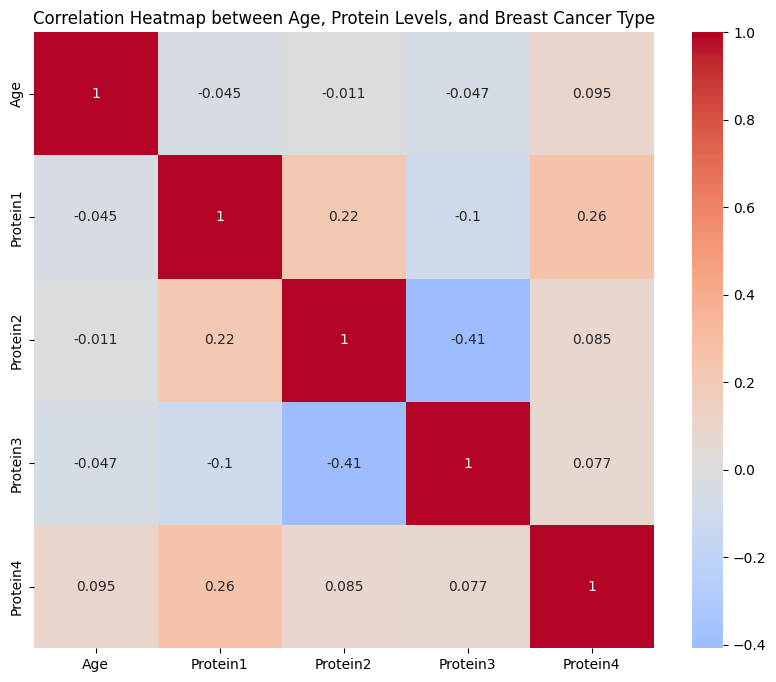

In [56]:
import seaborn as sns
columns_for_analysis = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Histology']
# Create a subset of data with selected columns
data_subset = data_cleaned[columns_for_analysis]
# Calculate the correlation matrix
correlation_matrix = data_subset.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Age, Protein Levels, and Breast Cancer Type')
plt.show()

**Splitting Dataset and Fitting LazyClassifier**

In [57]:
from sklearn.model_selection import train_test_split

# Specific features we want in X
selected_features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Histology', 'Tumour_Stage']

# Select the specific features from the cleaned data
X = data_cleaned[selected_features]
y = data_cleaned['Target']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Histology', 'Tumour_Stage'],drop_first=True)

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

from lazypredict.Supervised import LazyClassifier
# Creating a LazyClassifier instance
clf = LazyClassifier(ignore_warnings=True,predictions=True)

# Fit and predict using LazyClassifier
models = clf.fit(X_train, X_test, y_train, y_test)



100%|██████████| 29/29 [00:01<00:00, 21.75it/s]

[LightGBM] [Info] Number of positive: 204, number of negative: 49
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806324 -> initscore=1.426300
[LightGBM] [Info] Start training from score 1.426300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [58]:
from lazypredict.Supervised import LazyClassifier
# Creating a LazyClassifier instance
clf = LazyClassifier(ignore_warnings=True,predictions=True)

# Fit and predict using LazyClassifier
models = clf.fit(X_train, X_test, y_train, y_test)
# Displaying the models and their performances
print(models)

100%|██████████| 29/29 [00:01<00:00, 23.46it/s]

[LightGBM] [Info] Number of positive: 204, number of negative: 49
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 253, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.806324 -> initscore=1.426300
[LightGBM] [Info] Start training from score 1.426300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**Logestic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [60]:
input_data = pd.DataFrame({
    'Age': [63],  # Replace with the actual values
    'Protein1': [0.052728],
    'Protein2': [0.7221],
    'Protein3': [-0.30865],
    'Protein4': [-0.53129],
    'Histology_Infiltrating Lobular Carcinoma': [0],  # Replace with one-hot-encoded values
    'Histology_Mucinous Carcinoma': [0],
    'Tumour_Stage_II': [0],
    'Tumour_Stage_III': [1]
})

# Use the trained model to predict probabilities
predicted_probabilities = classifier.predict_proba(input_data)

# Print the probabilities
print(predicted_probabilities)


[[0.14316471 0.85683529]]


**SVM**

In [61]:
#Custon input with unique feature values
input_data = pd.DataFrame({
    'Age': [47],
    'Protein1': [0.33186],
    'Protein2': [-0.32765],
    'Protein3': [0.0033786],
    'Protein4': [1.1658],
    'Histology_Infiltrating Lobular Carcinoma': [0],
    'Histology_Mucinous Carcinoma': [1],
    'Tumour_Stage_II': [0],
    'Tumour_Stage_III': [1]
})
# Make probability predictions on the input data
probability_predictions = classifier.predict_proba(input_data)

# The 'probability_predictions' variable now contains the probability estimates for each class (0 and 1)
print(probability_predictions)

[[0.17239105 0.82760895]]
